# Before your start with this Tutorial

**Tutorial Intention:** Providing an example of iteration and related step on a data understanding phase for you to:

*   Experience the data science lifecycle using Vectice
*   See how simple it is to connect your notebook to Vectice
*   Learn how to structure and log your work using Vectice

**Resources needed:**
*   <b>Tutorial Project: Forecast in-store unit sales (23.1)</b> - You can find it as part of your personal workspace named after your name
*   Vectice Webapp Documentation: https://docs.vectice.com/
*   Vectice API documentation: https://api-docs.vectice.com/sdk/index.html



### Optional pip Install Packages

In [43]:
%pip install --q vectice -U

1462774.32s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Note: you may need to restart the kernel to use updated packages.


## Optional libraries - depending on your project

In [44]:
%pip install --q squarify
%pip install --q plotly
%pip install --q seaborn
%pip install --q nbformat -U

1462783.56s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Note: you may need to restart the kernel to use updated packages.


1462791.39s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Note: you may need to restart the kernel to use updated packages.


1462799.36s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Note: you may need to restart the kernel to use updated packages.


1462807.32s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Note: you may need to restart the kernel to use updated packages.


## Import libraries

In [2]:
# importing libraries
import pandas as pd  # data science essentials
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000
import matplotlib.pyplot as plt  # essential graphical output
import seaborn as sns  # enhanced graphical output
import numpy as np   # mathematical essentials
import squarify
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px

In [3]:
# import Vectice library
import vectice
from vectice import FileDataWrapper, DatasetSourceUsage 

## Download the datasets and config file used in this notebook (if on Colab or Jupyter)

The dataset used in this project can be found here:<br>
* [items.csv](https://vectice-examples.s3.us-west-1.amazonaws.com/Tutorial/ForecastTutorial/items.csv)<br>
* [holidays_events.csv](https://vectice-examples.s3.us-west-1.amazonaws.com/Tutorial/ForecastTutorial/holidays_events.csv)<br>
* [stores.csv](https://vectice-examples.s3.us-west-1.amazonaws.com/Tutorial/ForecastTutorial/stores.csv)<br>
* [oil.csv](https://vectice-examples.s3.us-west-1.amazonaws.com/Tutorial/ForecastTutorial/oil.csv)<br>
* [transactions.csv](https://vectice-examples.s3.us-west-1.amazonaws.com/Tutorial/ForecastTutorial/transactions.csv)<br>
* [train_reduced.csv](https://vectice-examples.s3.us-west-1.amazonaws.com/Tutorial/ForecastTutorial/train_reduced.csv)

In [47]:
# Download the files locally
!wget https://vectice-examples.s3.us-west-1.amazonaws.com/Tutorial/ForecastTutorial/items.csv -q --no-check-certificate
!wget https://vectice-examples.s3.us-west-1.amazonaws.com/Tutorial/ForecastTutorial/holidays_events.csv -q --no-check-certificate
!wget https://vectice-examples.s3.us-west-1.amazonaws.com/Tutorial/ForecastTutorial/stores.csv -q --no-check-certificate
!wget https://vectice-examples.s3.us-west-1.amazonaws.com/Tutorial/ForecastTutorial/oil.csv -q --no-check-certificate
!wget https://vectice-examples.s3.us-west-1.amazonaws.com/Tutorial/ForecastTutorial/transactions.csv -q --no-check-certificate
!wget https://vectice-examples.s3.us-west-1.amazonaws.com/Tutorial/ForecastTutorial/train_reduced.csv -q --no-check-certificate

1462815.95s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
1462822.51s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
1462828.73s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
1462834.71s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
1462841.05s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
1462853.20s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


##  Vectice Config     
- To log your work to Vectice, you need to connect your notebook to your profile using your personal API token       
- Click on your profile at the top right corner of the Vectice application --> API Tokens --> Create API Token       
- Provide a name and description for the key. We recommend you name the API Token: "Tutorial_API_Token" to avoid having to make additional changes to the notebook.
- Save it in a location accessible by this code
- #### If you are viewing this notebook in Google Colab, click the folder icon on the left bar and upload the file

#### Update the workspace name below to match the workspace name your project is in

In [4]:
#my_vectice = vectice.connect(config="Tutorial_API_token.json")
#my_workspace = my_vectice.workspace("YOUR WORKSPACE NAME") # replace workspace name
#my_project = my_workspace.project("Tutorial Project: Forecast in store unit sales (23.1)")
my_project = vectice.connect(config="vectice-config.json")

2023/02/17 11:24:32 INFO vectice.connection: Vectice successfully connected.
2023/02/17 11:24:33 INFO vectice.connection: Your current workspace: .Retail Ops and project: Corp Forecast in-store unit sales
2023/02/17 11:24:34 WARNING vectice.connection: No Iteration exists with activity. When an Iteration is created, last used assets will be displayed.


# Collect Initial Data

### Build dataframes

In [5]:
#read datasets
items = pd.read_csv("items.csv")
holiday_events = pd.read_csv("holidays_events.csv", parse_dates=['date'])
stores = pd.read_csv("stores.csv")
oil = pd.read_csv("oil.csv", parse_dates=['date'])
transactions = pd.read_csv("transactions.csv", parse_dates=['date'])
df = pd.read_csv("train_reduced.csv")

### Create Vectice dataset assets

In [6]:

# get the first step of the 'Data Understanding' phase
step = my_project.phase("Data Understanding").iteration().step("Collect Initial Data")

# Document the origin_datasets in Vectice:
step.origin_dataset = FileDataWrapper(path="items.csv", name="Items origin")
step.origin_dataset = FileDataWrapper(path="holidays_events.csv", name="Holiday origin")
step.origin_dataset = FileDataWrapper(path="stores.csv", name="Stores origin")
step.origin_dataset = FileDataWrapper(path="oil.csv", name="Oil origin")
step.origin_dataset = FileDataWrapper(path="transactions.csv", name="Transactions origin")

# Close step, mark it as completed in the webapp and publish message
# The next_step() method closes the current step and opens the next one in one call
step = step.next_step(message="The datasets for this project have been identified.")

2023/02/17 11:24:36 INFO vectice.models.project: Phase with id: 32681 successfully retrieved.
2023/02/17 11:24:37 INFO vectice.models.phase: Iteration number 2 (id 4561) successfully retrieved.
2023/02/17 11:24:37 INFO vectice.models.iteration: Step: Collect Initial Data successfully retrieved.
2023/02/17 11:24:37 INFO vectice.models.datasource.datawrapper.file_data_wrapper: File: items.csv wrapped successfully.
2023/02/17 11:24:38 INFO vectice.models.phase: Iteration number 2 (id 4561) successfully retrieved.
2023/02/17 11:24:39 INFO vectice.models.step: Code captured and will be linked to asset.
2023/02/17 11:24:44 INFO vectice.models.git_version: Code captured the following changed files; .gitignore, 22.4/samples/SimpleProject_HelloWorld.ipynb, 23.1/samples/howto_captureDatasets.ipynb, 23.1/samples/howto_captureModels.ipynb, 23.1/tutorial/Data_Preparation.ipynb
2023/02/17 11:24:44 INFO vectice.api.client: Successfully registered Dataset(name='Items origin', id=22589, version='Versio

# Describe data

### Collect basic data properties

In [7]:
#provide info about the item dataset
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4100 entries, 0 to 4099
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   item_nbr    4100 non-null   int64 
 1   family      4100 non-null   object
 2   class       4100 non-null   int64 
 3   perishable  4100 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 128.2+ KB


In [8]:
#provide info about the stores dataset
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [9]:
#provide info about the holiday_events dataset
holiday_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         350 non-null    datetime64[ns]
 1   type         350 non-null    object        
 2   locale       350 non-null    object        
 3   locale_name  350 non-null    object        
 4   description  350 non-null    object        
 5   transferred  350 non-null    bool          
dtypes: bool(1), datetime64[ns](1), object(4)
memory usage: 14.1+ KB


In [10]:
#perform date formating
holiday_events['date'] = pd.to_datetime(holiday_events['date'], format="%Y-%m-%d")

### Document the "Describe Data" step and close it

In [11]:
# Document the "Describe Data" step and close it
# formatting the dimensions of the dataset (ROWS, COLUMNS)
msg = "\nSize of Original Dataset:\n"\
"Items dataset: Observations: " + str(items.shape[0]) + " - Features: " + str(items.shape[1])  + "\n" \
"Holiday dataset: Observations: " + str(holiday_events.shape[0])  + "- Features: " + str(holiday_events.shape[1])  + "\n" \
"Stores dataset: Observations: " + str(stores.shape[0])  + " - Features: " + str(stores.shape[1])  + "\n" \
"Oil: Observations: " + str(oil.shape[0])  + " - Features: " + str(oil.shape[1])  + "\n" \
"Transactions: Observations: " + str(transactions.shape[0])  + " - Features: " + str(transactions.shape[1])

# Document current step and get next one
step = step.next_step(message="The data properties have been reviewed for the datasets identified\n" + msg)

2023/02/17 11:25:03 INFO vectice.models.step: 'Describe Data' was successfully closed.
2023/02/17 11:25:03 INFO vectice.models.step: Next step : Step(name='Explore data', id=17201, description='Identify meaningful variables. Compute numerical variables mean, median, and mode. Visualize distributions, identify outliers, and data relationships. Create hypotheses to test.', completed=False)


# Explore Data

### Visualizations

#### Stores Visualizations

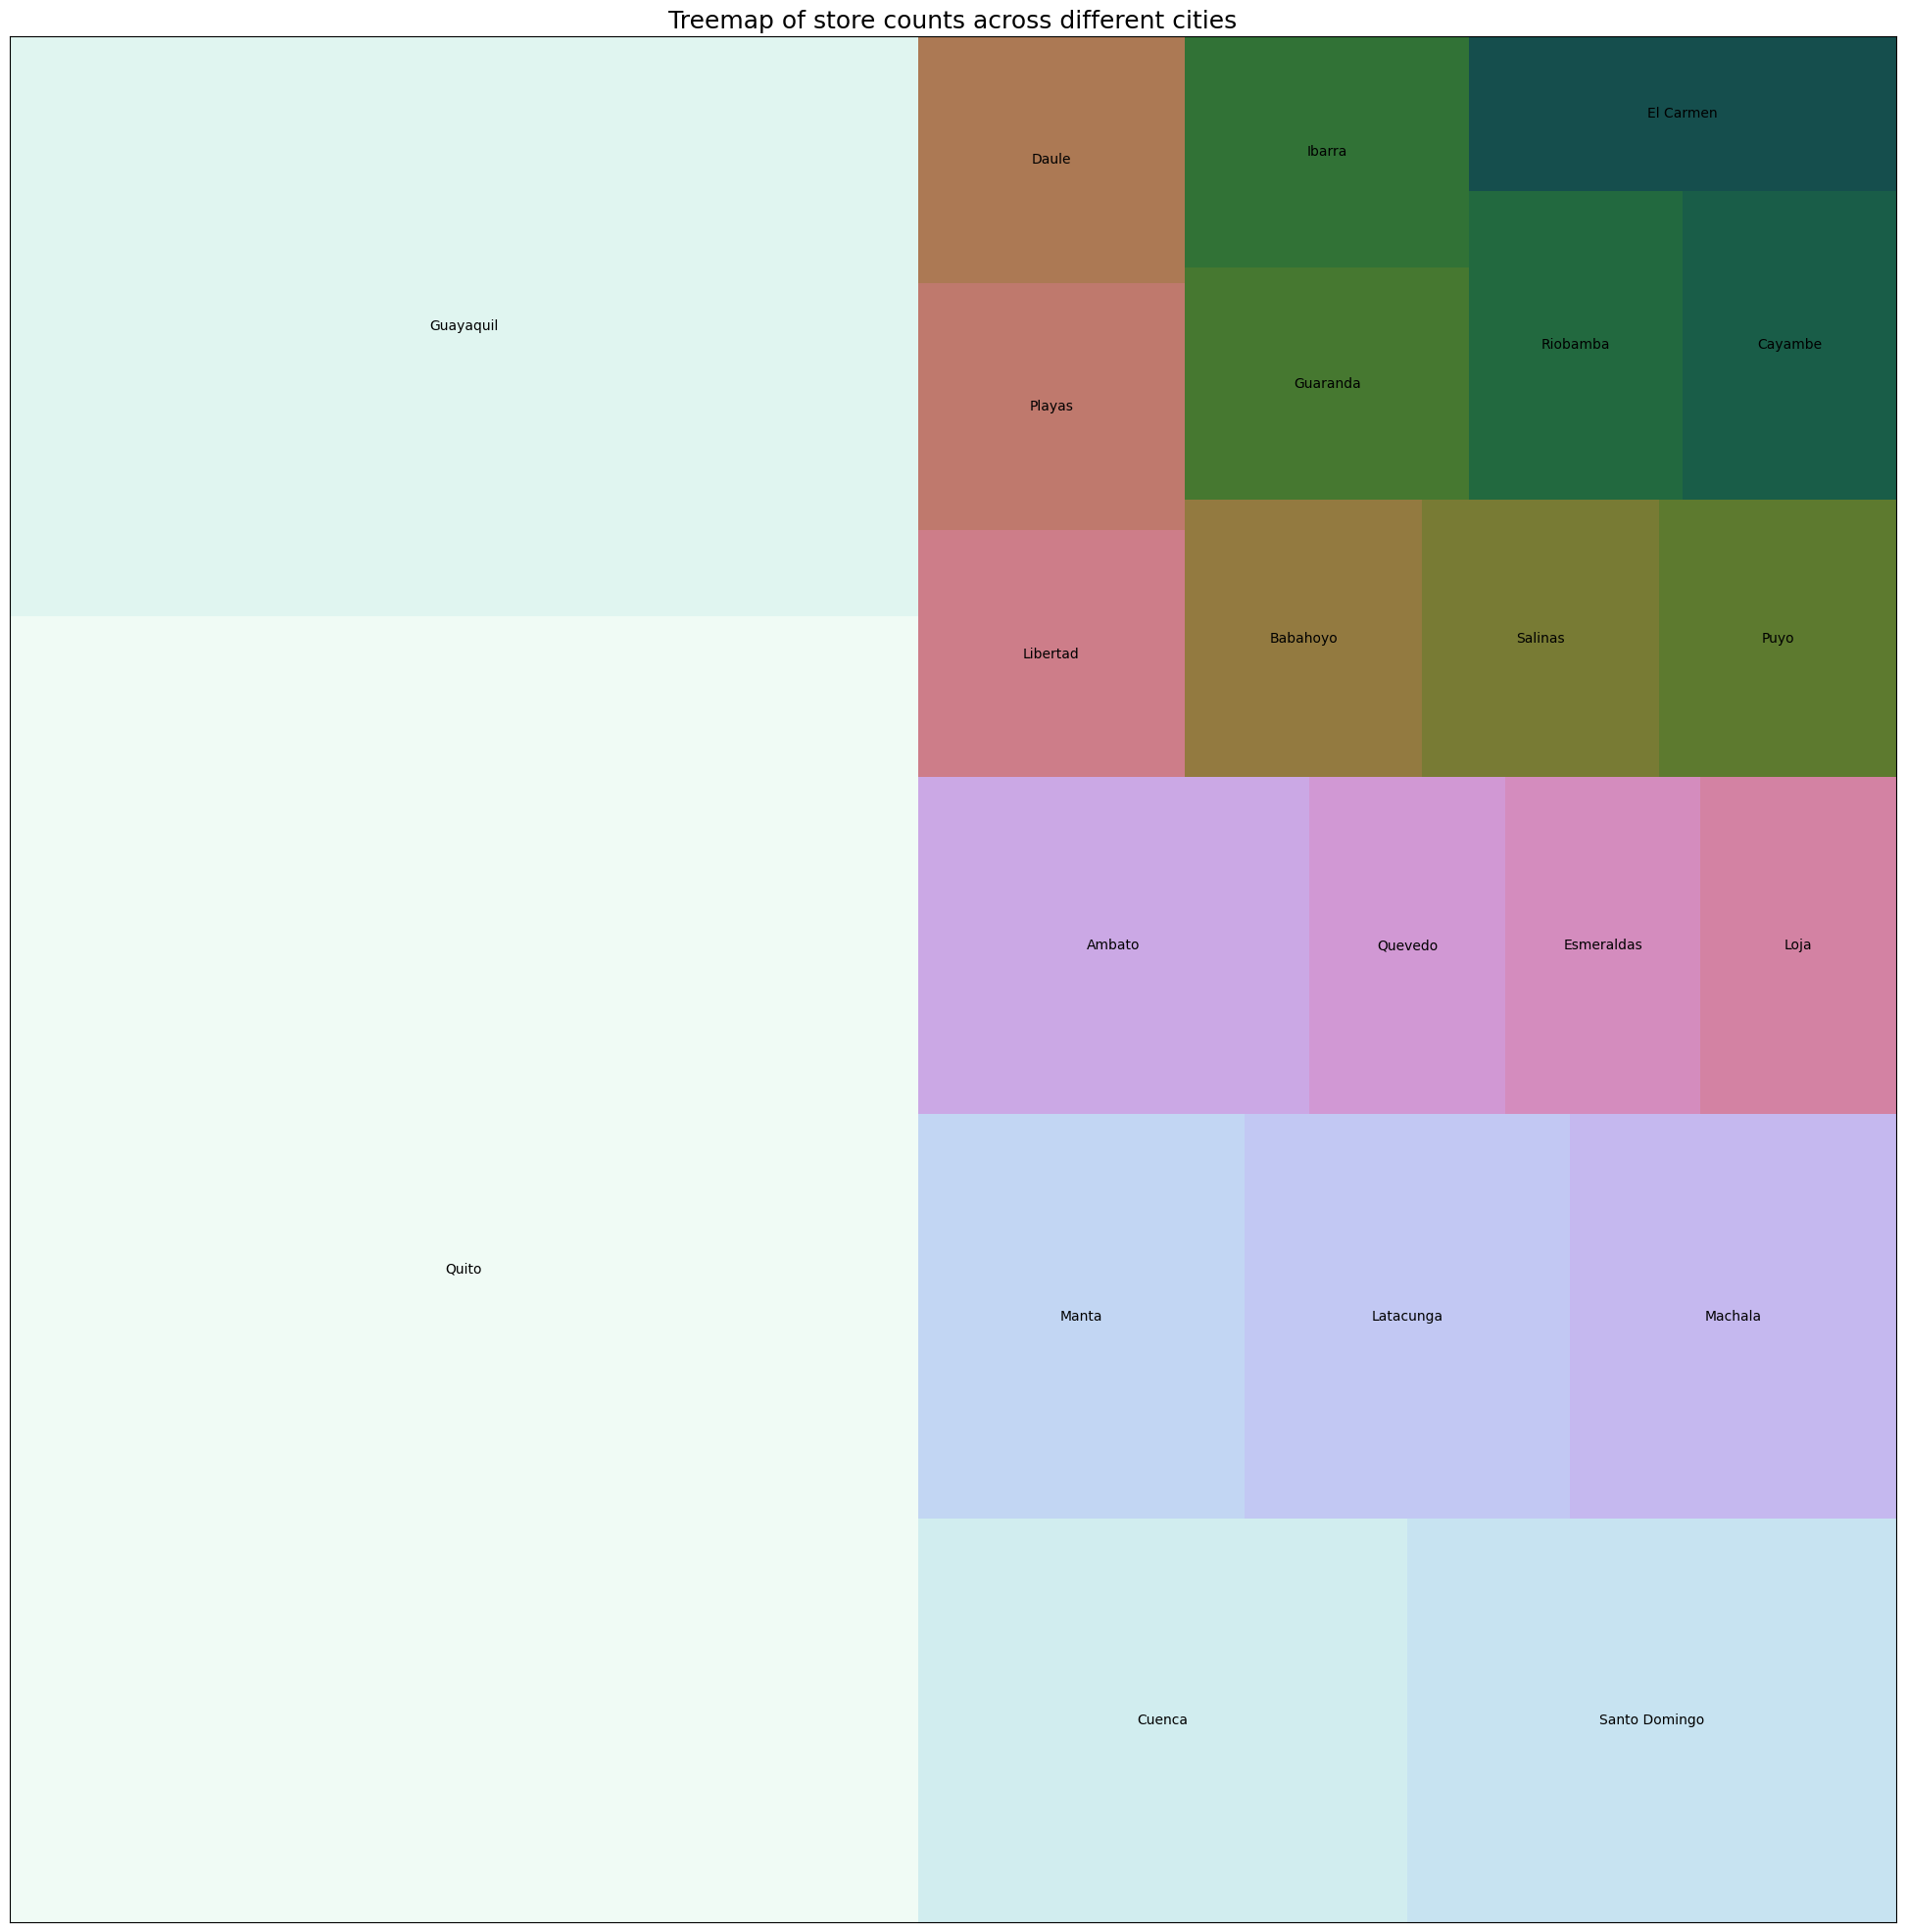

In [12]:
#Treemap of store counts across different cities
fig = plt.figure(figsize=(25, 21))
marrimeko=stores.city.value_counts().to_frame()
ax = fig.add_subplot(111, aspect="equal")
ax = squarify.plot(sizes=marrimeko['city'].values,label=marrimeko.index,
              color=sns.color_palette('cubehelix_r', 28), alpha=1)
ax.set_xticks([])
ax.set_yticks([])
fig=plt.gcf()
fig.set_size_inches(40,25)
plt.title("Treemap of store counts across different cities", fontsize=18)
fig.savefig('Store1.png', dpi=300)
plt.show()

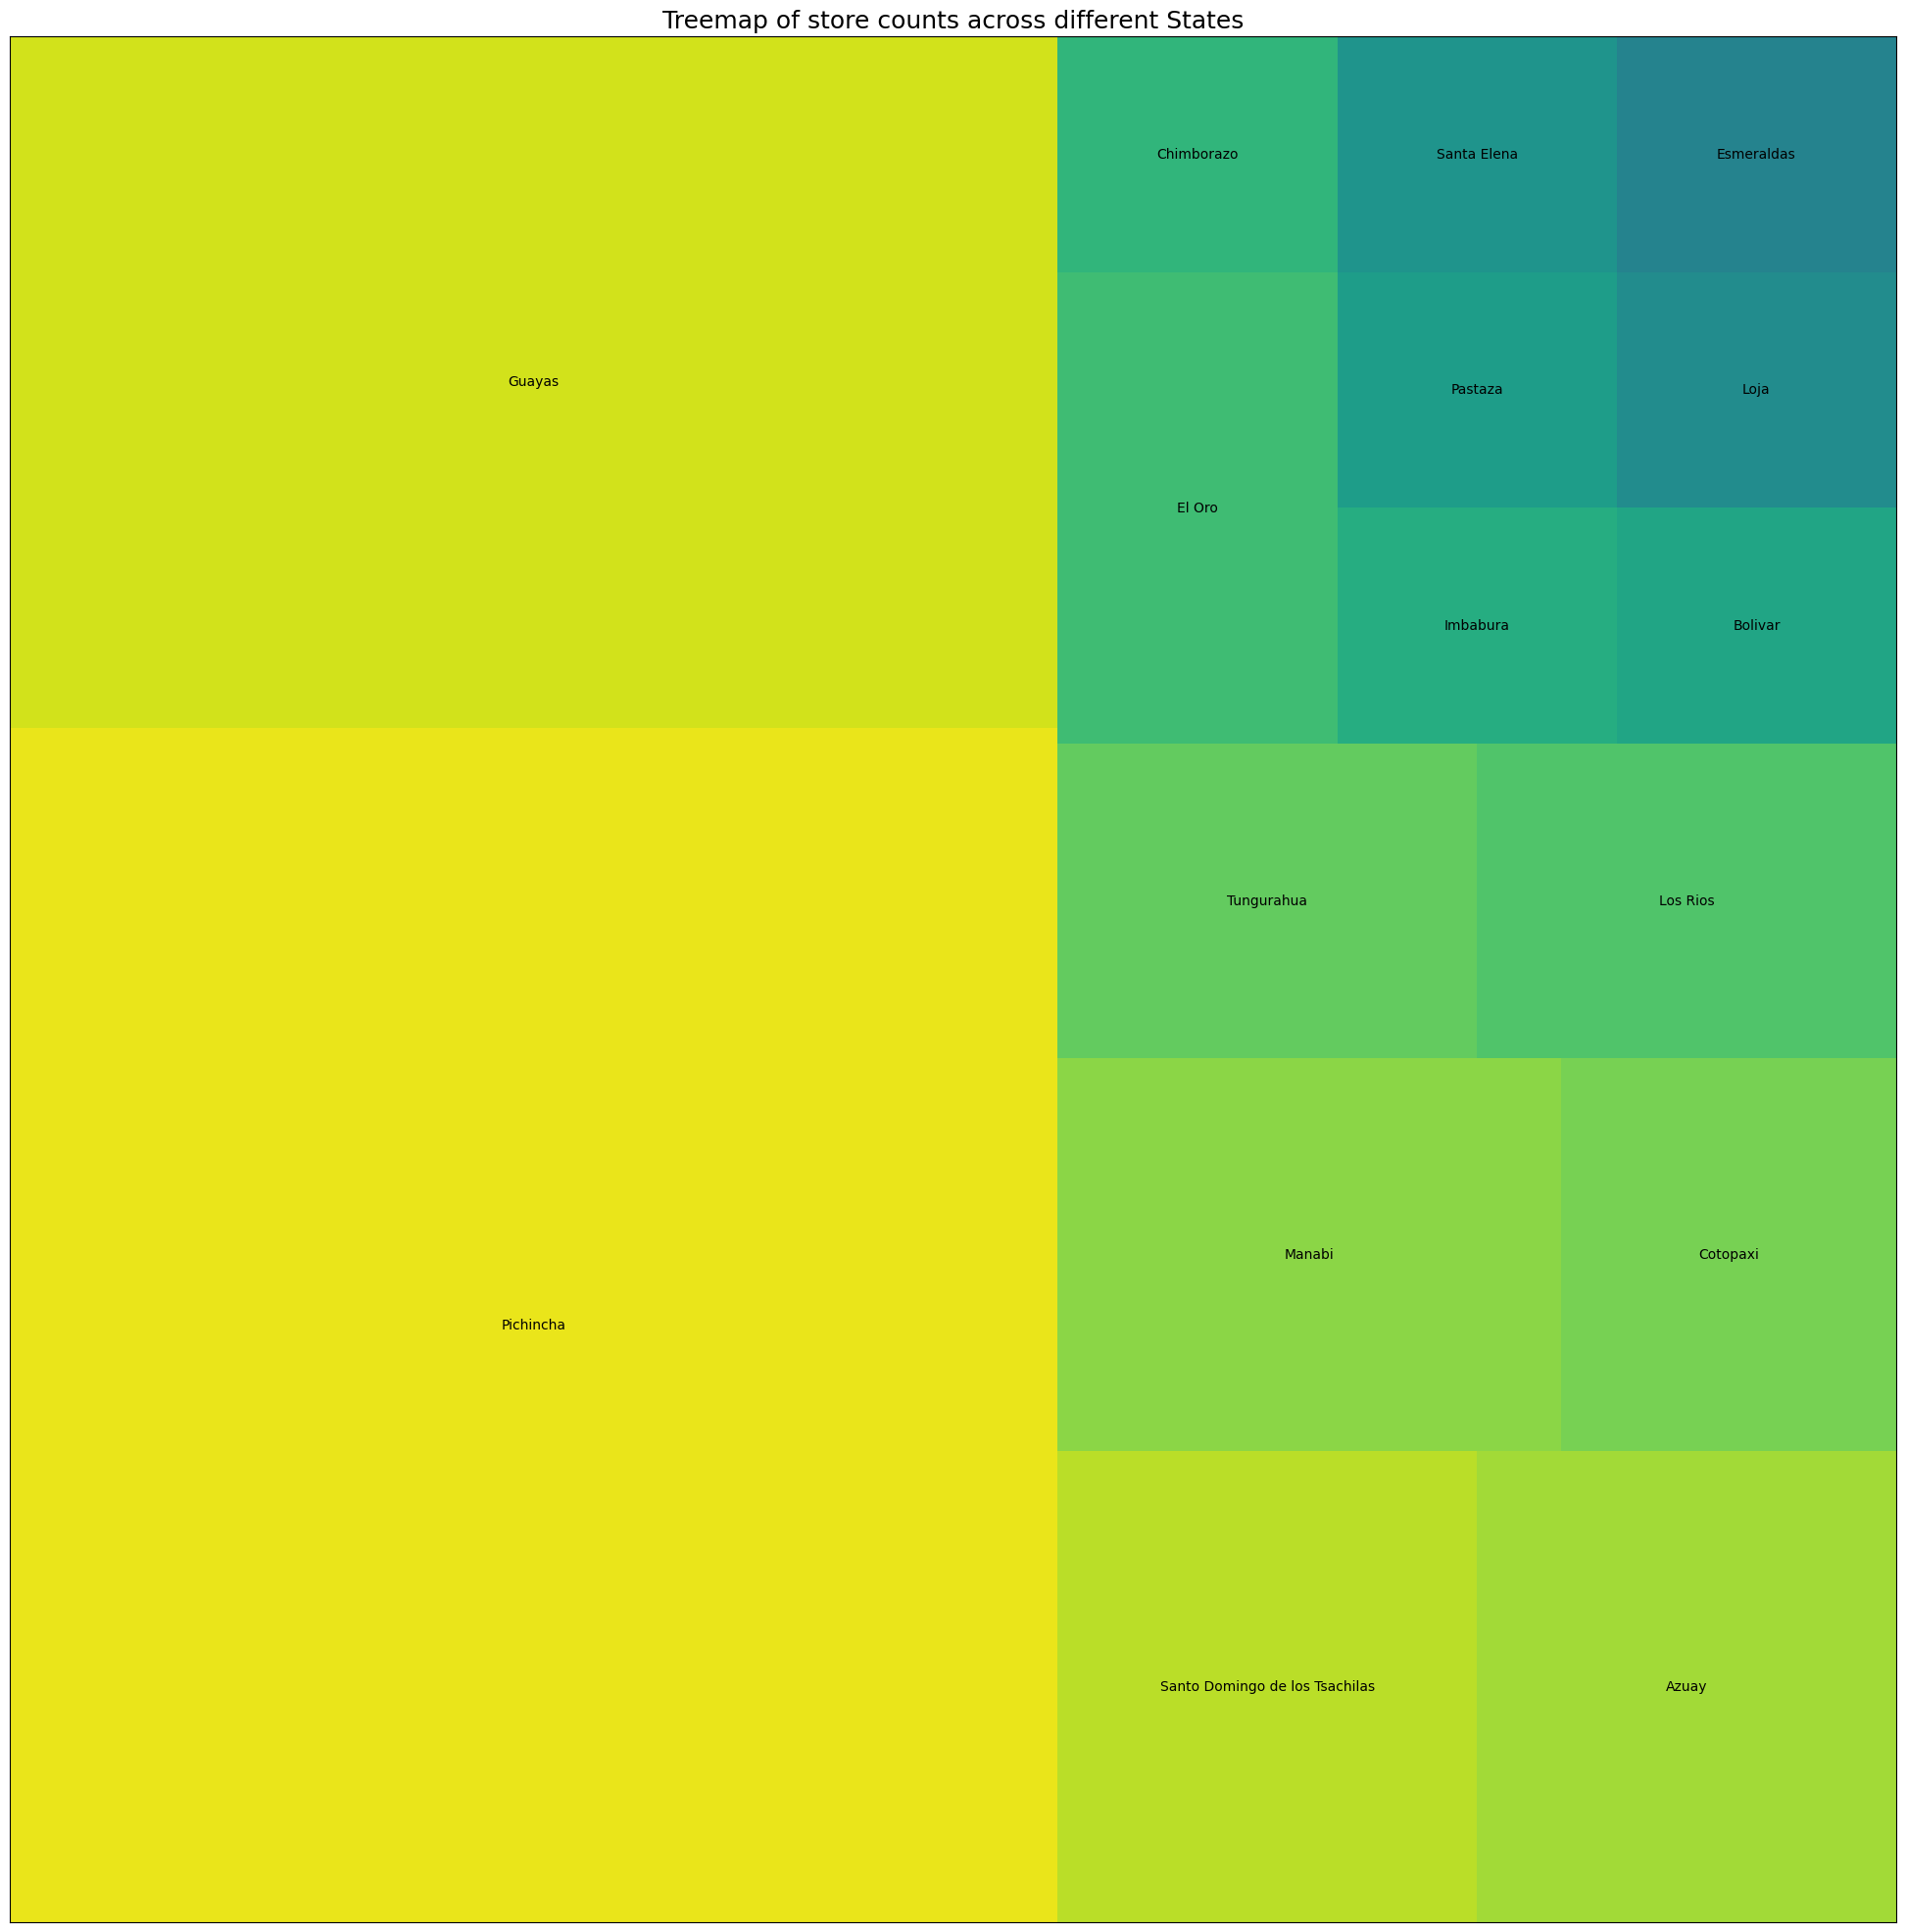

In [13]:
#Treemap of store counts across different States
fig = plt.figure(figsize=(25, 21))
marrimeko=stores.state.value_counts().to_frame()
ax = fig.add_subplot(111, aspect="equal")
ax = squarify.plot(sizes=marrimeko['state'].values,label=marrimeko.index,
              color=sns.color_palette('viridis_r', 28), alpha=1)
ax.set_xticks([])
ax.set_yticks([])
fig=plt.gcf()
fig.set_size_inches(40,25)
plt.title("Treemap of store counts across different States", fontsize=18)
fig.savefig('Store2.png', dpi=300)
plt.show()

##### Inspecting the allocation of clusters to store numbers - Visualizations

/var/folders/3_/l7f8whx5221gn40trqt3h6l80000gn/T/ipykernel_90934/292514687.py:11: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.



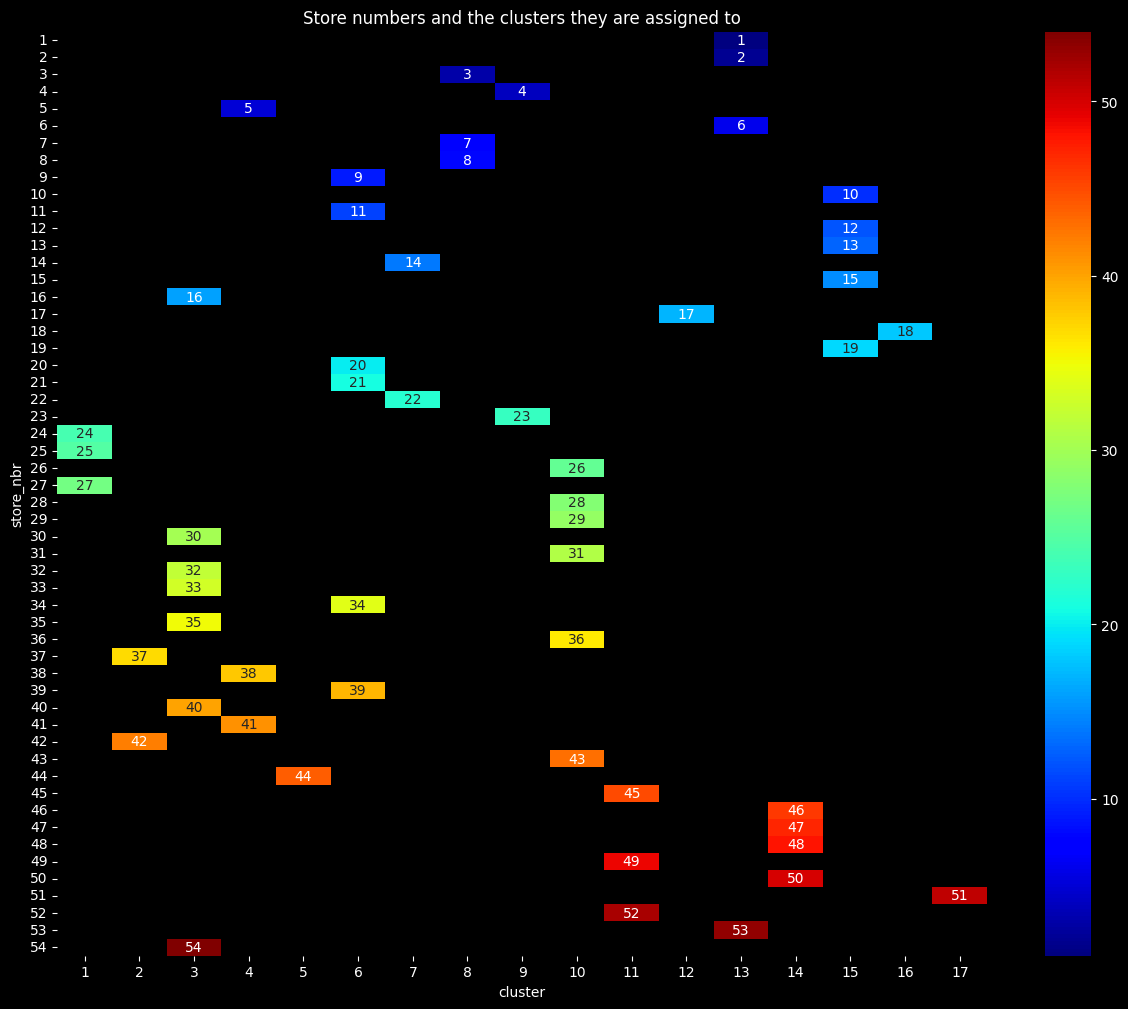

<Figure size 640x480 with 0 Axes>

In [14]:
#Store numbers and the clusters they are assigned to
# Unhide to see the sorted zip order
neworder = [23, 24, 26, 36, 41, 15, 29, 31, 32, 34, 39, 
            53, 4, 37, 40, 43, 8, 10, 19, 20, 33, 38, 13, 
            21, 2, 6, 7, 3, 22, 25, 27, 28, 30, 35, 42, 44, 
            48, 51, 16, 0, 1, 5, 52, 45, 46, 47, 49, 9, 11, 12, 14, 18, 17, 50]

# Finally plot the seaborn heatmap
plt.style.use('dark_background')
plt.figure(figsize=(15,12))
store_pivot = stores.dropna().pivot("store_nbr","cluster", "store_nbr")
ax = sns.heatmap(store_pivot, cmap='jet', annot=True, linewidths=0, linecolor='white')
plt.title('Store numbers and the clusters they are assigned to')
plt.show()
plt.savefig('Store3.png', dpi=300)

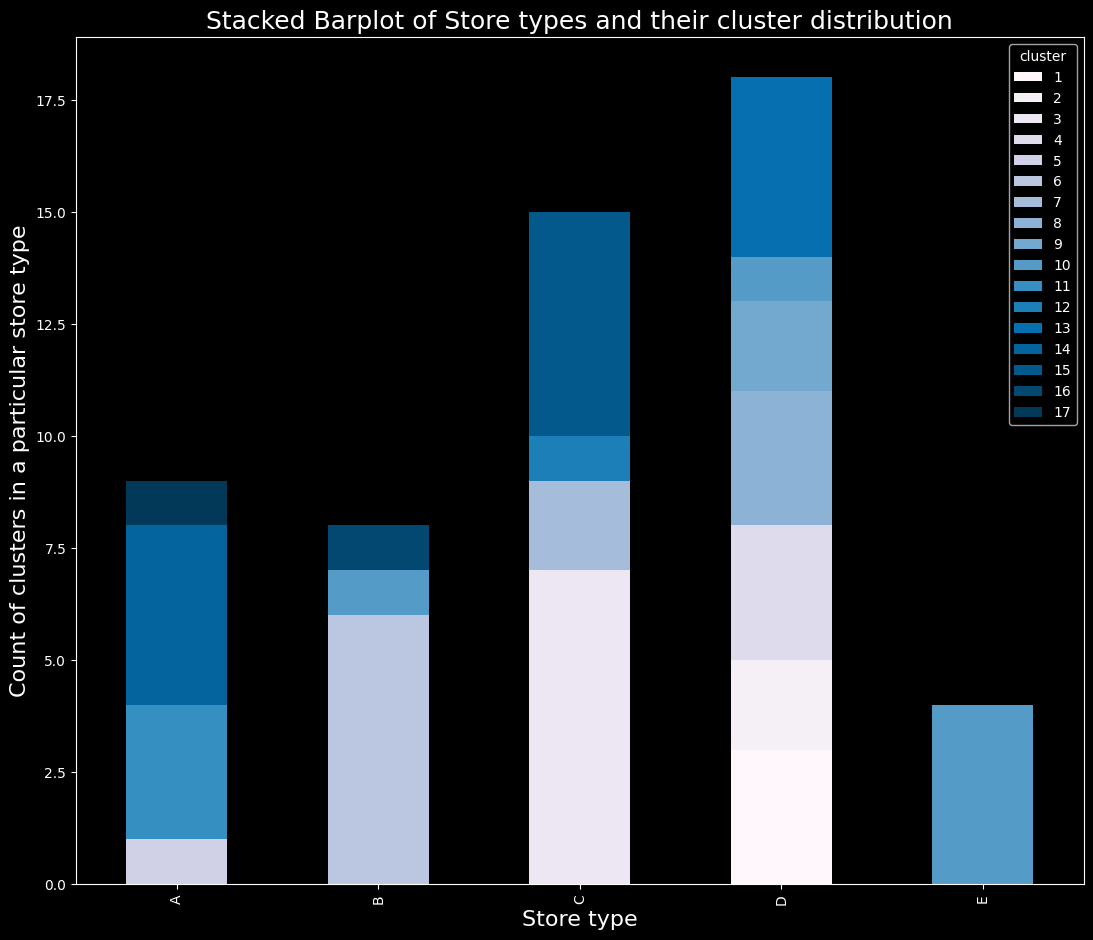

In [15]:
#Stacked Barplot of Store types and their cluster distribution
plt.style.use('dark_background')
type_cluster = stores.groupby(['type','cluster']).size()
type_cluster.unstack().plot(kind='bar',stacked=True, colormap= 'PuBu', figsize=(13,11),  grid=False)
plt.title('Stacked Barplot of Store types and their cluster distribution', fontsize=18)
plt.ylabel('Count of clusters in a particular store type', fontsize=16)
plt.xlabel('Store type', fontsize=16)
plt.savefig('Store4.png', dpi=300);
plt.show()

#### Holidays Visualization

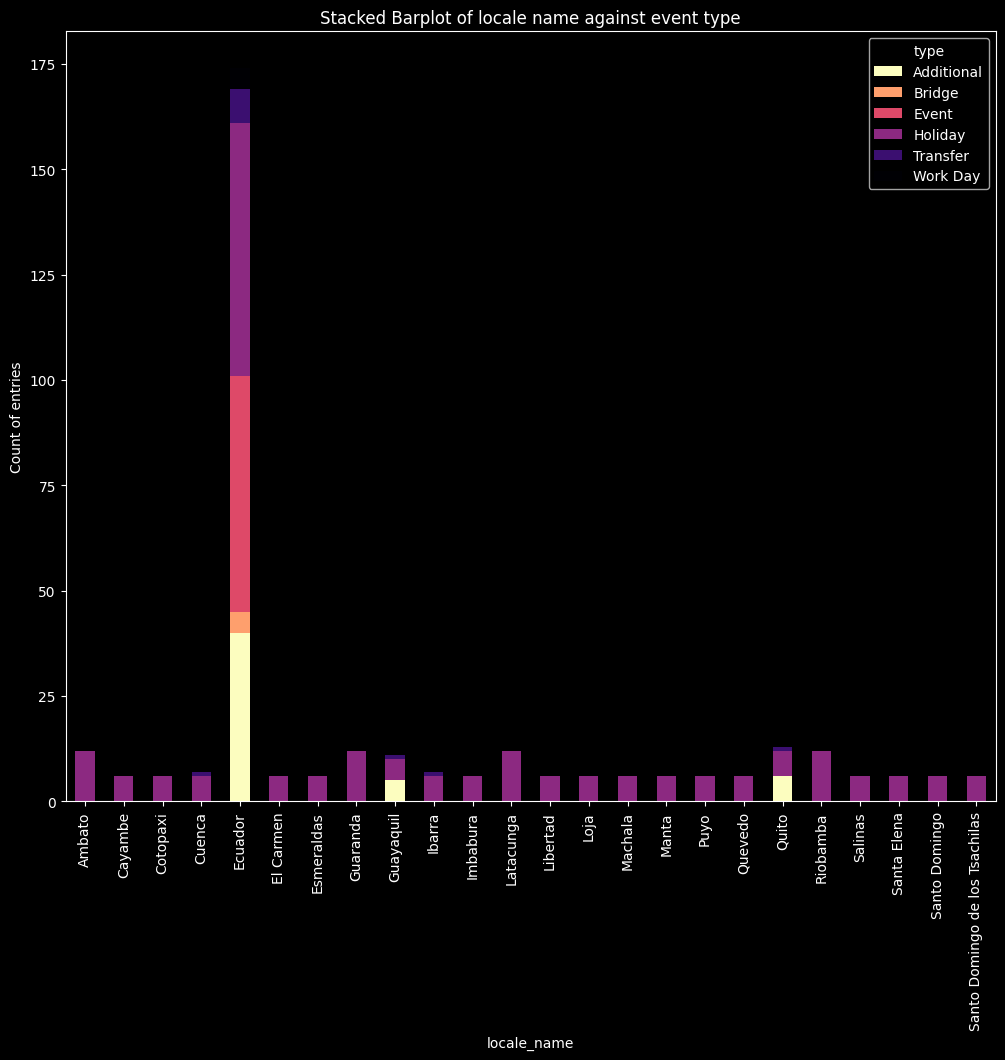

In [16]:
#Stacked Barplot of locale name against event type
holiday_local_type = holiday_events.groupby(['locale_name', 'type']).size()
holiday_local_type.unstack().plot(kind='bar',stacked=True, colormap= 'magma_r', figsize=(12,10),  grid=False)
plt.title('Stacked Barplot of locale name against event type')
plt.ylabel('Count of entries')
plt.savefig('holiday.png')
plt.show()

#### Transactions Visualization

/var/folders/3_/l7f8whx5221gn40trqt3h6l80000gn/T/ipykernel_90934/3320900153.py:2: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



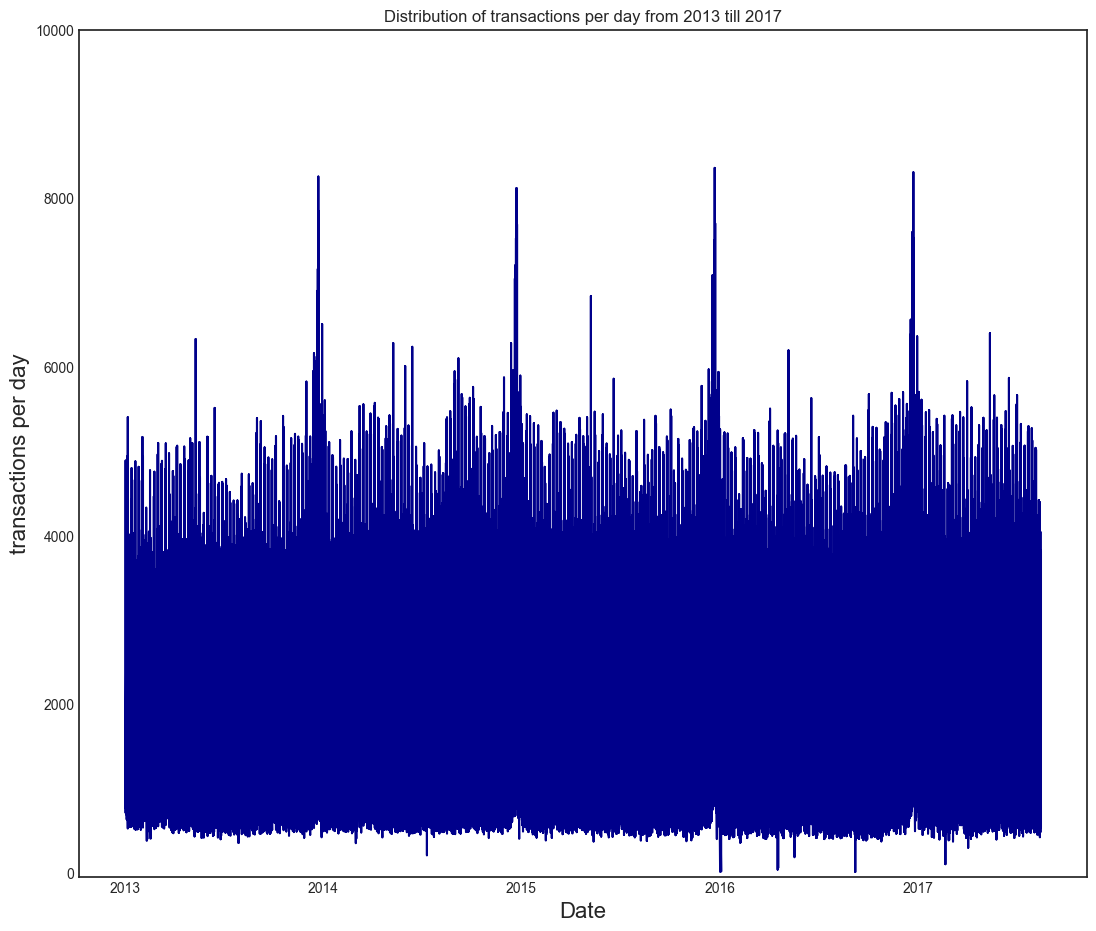

In [17]:
#Distribution of transactions per day from 2013 till 2017
plt.style.use('seaborn-white')
plt.figure(figsize=(13,11))
plt.plot(transactions.date.values, transactions.transactions.values, color='darkblue')
plt.ylim(-50, 10000)
plt.title("Distribution of transactions per day from 2013 till 2017")
plt.ylabel('transactions per day', fontsize= 16)
plt.xlabel('Date', fontsize= 16)
plt.savefig('transaction1317.png')
plt.show()

#### Items Visualizations

In [18]:

#Counts of items per family category
x, y = (list(x) for x in zip(*sorted(zip(items.family.value_counts().index, 
                                         items.family.value_counts().values), 
                                        reverse = False)))
trace2 = go.Bar(
    y=items.family.value_counts().values,
    x=items.family.value_counts().index,
    marker=dict(
        color=items.family.value_counts().values,
        colorscale = 'Portland',
        reversescale = False
    ),
    orientation='v',
)

layout = dict(
    title='Counts of items per family category',
     width = 800, height = 800,
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
#         domain=[0, 0.85],
    ))

fig1 = go.Figure(data=[trace2])
fig1['layout'].update(layout)
py.iplot(fig1, filename='plots')
plt.savefig('Item1.png')

<Figure size 640x480 with 0 Axes>

In [19]:
#Number of items attributed to a particular item class
x, y = (list(x) for x in zip(*sorted(zip(items['class'].value_counts().index, 
                                         items['class'].value_counts().values), 
                                        reverse = False)))
trace2 = go.Bar(
    x=items['class'].value_counts().index,
    y=items['class'].value_counts().values,
    marker=dict(
        color=items['class'].value_counts().values,
        colorscale = 'Portland',
        reversescale = True
    ),
    orientation='v',
)

layout = dict(
    title='Number of items attributed to a particular item class',
     width = 800, height = 1400,
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
#         domain=[0, 0.85],
    ))

fig1 = go.Figure(data=[trace2])
fig1['layout'].update(layout)
py.iplot(fig1, filename='plots')
plt.savefig('Item2.png')

<Figure size 640x480 with 0 Axes>

/var/folders/3_/l7f8whx5221gn40trqt3h6l80000gn/T/ipykernel_90934/3886071574.py:2: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



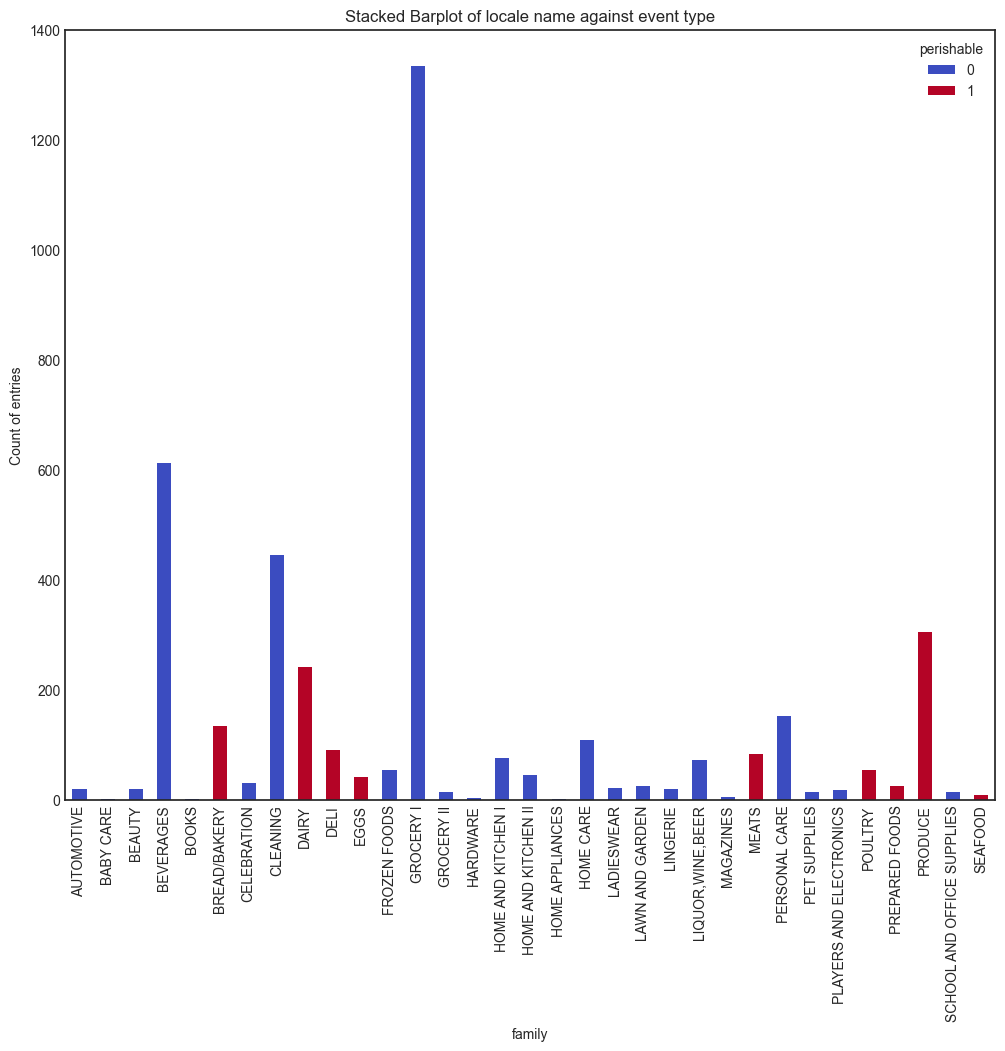

In [20]:
#Stacked Barplot of locale name against event type
plt.style.use('seaborn-white')
fam_perishable = items.groupby(['family', 'perishable']).size()
fam_perishable.unstack().plot(kind='bar',stacked=True, colormap= 'coolwarm', figsize=(12,10),  grid=False)
plt.title('Stacked Barplot of locale name against event type')
plt.ylabel('Count of entries')
plt.savefig('Item3.png')

### Document our findings in Vectice

In [21]:
#Close step, mark it as completed in the webapp and publish message
step = step.next_step(message="We created visualization for each of our datasets for value distribution, outliers and join candidates across all datasets.\nSome side reseach also gave sense to some data incoherence that could be observed, caused by black swan events, such as the earthquake of 2016 and the pandemic of 2020.")

2023/02/17 11:25:29 INFO vectice.models.step: 'Explore data' was successfully closed.
2023/02/17 11:25:29 INFO vectice.models.step: Next step : Step(name='Verify Data Quality', id=17204, description='Ensure and sustain data quality by assessing data accuracy, relevancy, completeness, timeliness, and consistency.', completed=False)


# Verify Data Quality

### Basic EDA

In [22]:

datasets = {"items": items, "holiday_events": holiday_events, "stores": stores, "oil": oil, "transaction": transactions}
for name, ds in datasets.items():
    print(f"Dataset: {name}")
    print(f"There are {len(ds)} rows in the dataset.")
    print("Isnull report:")
    print(ds.isnull().sum())
    print("Missing values report:")
    print(ds.isna())
    print("-----------------------")

Dataset: items
There are 4100 rows in the dataset.
Isnull report:
item_nbr      0
family        0
class         0
perishable    0
dtype: int64
Missing values report:
      item_nbr  family  class  perishable
0        False   False  False       False
1        False   False  False       False
2        False   False  False       False
3        False   False  False       False
4        False   False  False       False
...        ...     ...    ...         ...
4095     False   False  False       False
4096     False   False  False       False
4097     False   False  False       False
4098     False   False  False       False
4099     False   False  False       False

[4100 rows x 4 columns]
-----------------------
Dataset: holiday_events
There are 350 rows in the dataset.
Isnull report:
date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64
Missing values report:
      date   type  locale  locale_name  description  transferred
0   

### Document our findings in Vectice

In [23]:
#Close step, mark it as completed in the webapp and publish message
step.close(message="The information comprise in this dataset is accurate and comprehensive.\nAs the information aligns with other trusted resources, the dataset was considered as reliable and also relevant to the business problem we are trying to solve.\nHowever, this data can not be used for real time reporting as the data does not update itself.\nFurther data preparation is required.")

2023/02/17 11:25:31 INFO vectice.models.step: 'Verify Data Quality' was successfully closed.
